In [2109]:
# -----------------------------------------------
# タイタニックデータビューイング
# -----------------------------------------------

In [2110]:
# -------------------------------------------------------------------
# ライブラリの読込
# -------------------------------------------------------------------
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
from pandas import Series, DataFrame

import scipy as sp
import seaborn as sns
sns.set()

import sklearn
import unicodedata

%matplotlib inline
%precision 3

'%.3f'

In [2111]:
plt.rcParams['font.family'] = 'IPAexGothic'

In [2112]:
print(mpl.get_configdir())
print(mpl.matplotlib_fname())

/root/.config/matplotlib
/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [2113]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 300)

In [2114]:
pd.options.display.float_format = '{:.6f}'.format

In [2115]:
# -----------------------------------------------
# タイタニックデータ 読み込み
# -----------------------------------------------

In [2116]:
raw_path = '../data/raw/'

In [2117]:
# -------------------------------------------------------------------
# 学習データを読み込み
# -------------------------------------------------------------------
train = pd.read_csv(raw_path + 'train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2118]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2119]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S


In [2120]:
# --------------------------------------------------------------------------------------
# 学習データ情報
# （欠損なし） PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Fare 
# （欠損あり） Age,Cabin,Embarked  
# --------------------------------------------------------------------------------------

In [2121]:
# --------------------------------------------------------------------------------------
# 単独データの可視化
# --------------------------------------------------------------------------------------

In [2122]:
survived = train['Survived'].value_counts().rename({0:'死亡', 1:'生存'})
print(survived)

死亡    549
生存    342
Name: Survived, dtype: int64


<BarContainer object of 2 artists>

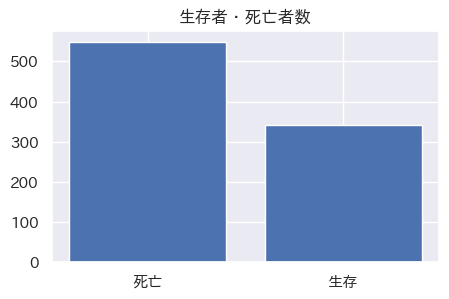

In [2123]:
plt.figure(figsize=(5, 3))
plt.title('生存者・死亡者数')
plt.bar(survived.index, survived)


In [2124]:
sex = train['Sex'].value_counts().rename({'male':'男性', 'female':'女性'})
print(sex)

男性    577
女性    314
Name: Sex, dtype: int64


<BarContainer object of 2 artists>

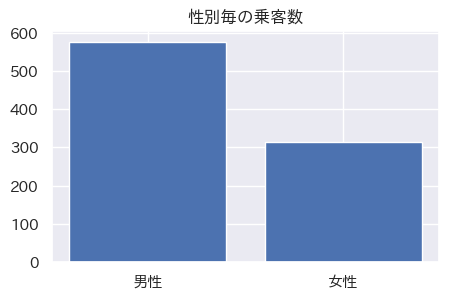

In [2125]:
plt.figure(figsize=(5, 3))
plt.title('性別毎の乗客数')
plt.bar(sex.index, sex)


In [2126]:
pclass = train['Pclass'].value_counts().sort_index().rename({3:'三等', 2:'二等', 1:'一等'})
print(pclass)

一等    216
二等    184
三等    491
Name: Pclass, dtype: int64


<BarContainer object of 3 artists>

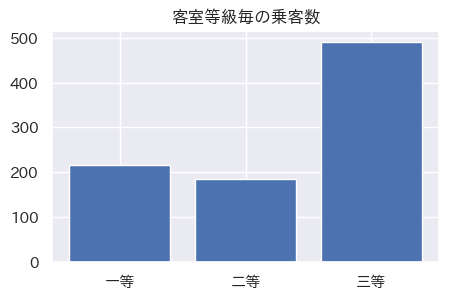

In [2127]:
plt.figure(figsize=(5, 3))
plt.title('客室等級毎の乗客数')
plt.bar(pclass.index, pclass)

In [2128]:
age = train['Age'].value_counts().sort_index()
# print(age)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

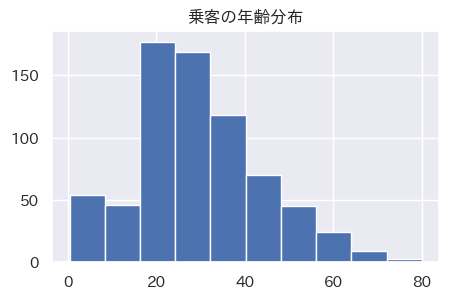

In [2129]:
plt.figure(figsize=(5, 3))
plt.title('乗客の年齢分布')
plt.hist(train['Age'])

In [2130]:
# なぜか年齢が小数点の乗客が存在する

<BarContainer object of 88 artists>

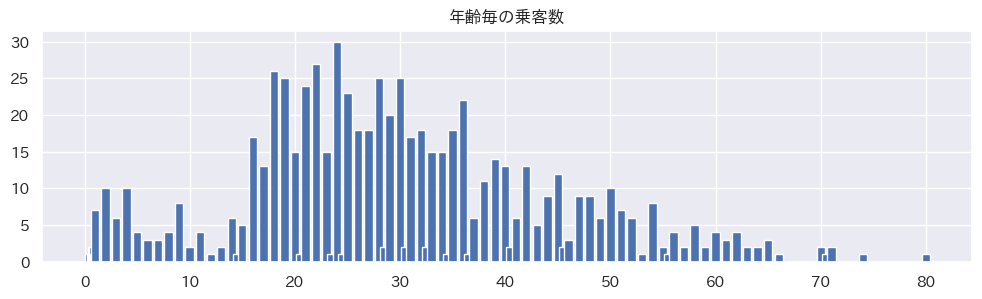

In [2131]:
plt.figure(figsize=(12, 3))
plt.title('年齢毎の乗客数')
plt.bar(age.index, age)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.   ,  25.616,  51.233,  76.849, 102.466, 128.082, 153.699,
        179.315, 204.932, 230.548, 256.165, 281.781, 307.398, 333.014,
        358.63 , 384.247, 409.863, 435.48 , 461.096, 486.713, 512.329]),
 <BarContainer object of 20 artists>)

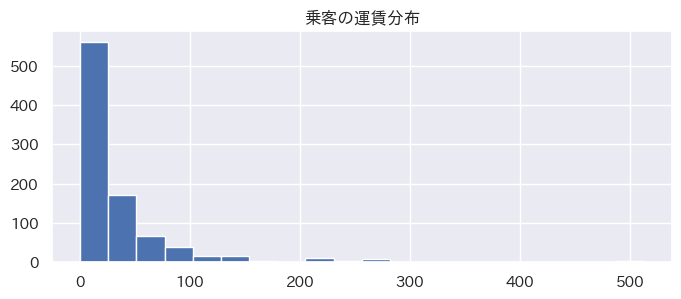

In [2132]:
plt.figure(figsize=(8, 3))
plt.title('乗客の運賃分布')
plt.hist(train['Fare'], bins=20)

In [2133]:
# 料金が0の謎の乗客が15名いる
train.loc[train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.000000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.000000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.000000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.000000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.000000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.000000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.000000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.000000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.000000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.000000,NaN,S


(array([ 15.,   0.,   0.,   0.,   0.,   2., 167., 183., 108.,  59., 117.,
         65.,  46.,  39.,  39.,  20.,  11.,  17.,   0.,   3.]),
 array([0.   , 0.136, 0.271, 0.407, 0.542, 0.678, 0.813, 0.949, 1.084,
        1.22 , 1.355, 1.491, 1.626, 1.762, 1.897, 2.033, 2.168, 2.304,
        2.439, 2.575, 2.71 ]),
 <BarContainer object of 20 artists>)

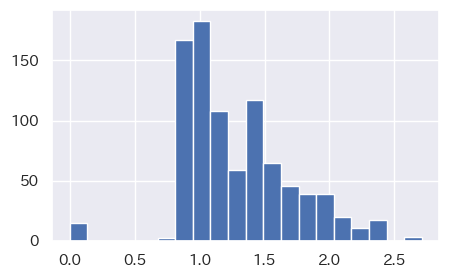

In [2134]:
plt.figure(figsize=(5, 3))
train['Fare_log10'] = np.log10(train['Fare']+1)  # 0の客がいるので+1して対数を取る
plt.hist(train['Fare_log10'], bins=20)

In [2135]:
embarked = train['Embarked'].value_counts().rename({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southamptom'})
print(embarked)

Southamptom    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64


<BarContainer object of 3 artists>

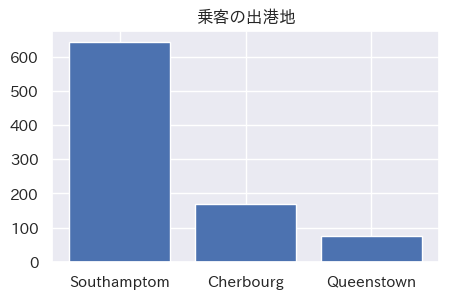

In [2136]:
plt.figure(figsize=(5, 3))
plt.title('乗客の出港地')
plt.bar(embarked.index, embarked)

In [2137]:
sibsp = train['SibSp'].value_counts().sort_index()
print(sibsp)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


<BarContainer object of 7 artists>

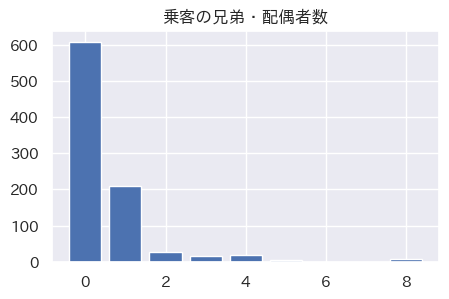

In [2138]:
plt.figure(figsize=(5, 3))
plt.title('乗客の兄弟・配偶者数')
plt.bar(sibsp.index, sibsp)

In [2139]:
parch = train['Parch'].value_counts().sort_index()
print(parch)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


<BarContainer object of 7 artists>

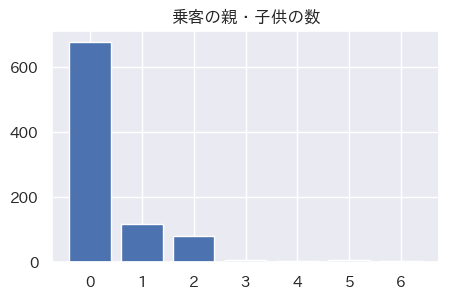

In [2140]:
plt.figure(figsize=(5, 3))
plt.title('乗客の親・子供の数')
plt.bar(parch.index, parch)

In [2141]:
# --------------------------------------------------------------------------------------
# 複数データの可視化
# --------------------------------------------------------------------------------------

In [2142]:
# --------------------------------------------------------------------------------------
# 生死と各種変数の関係
# --------------------------------------------------------------------------------------

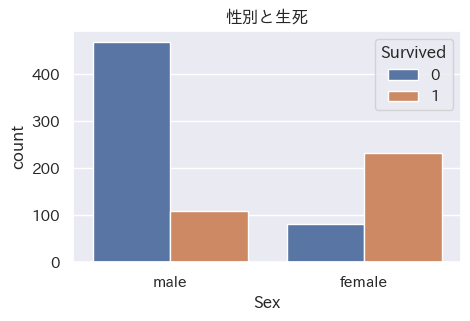

In [2143]:
plt.figure(figsize=(5, 3))
plt.title('性別と生死')
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

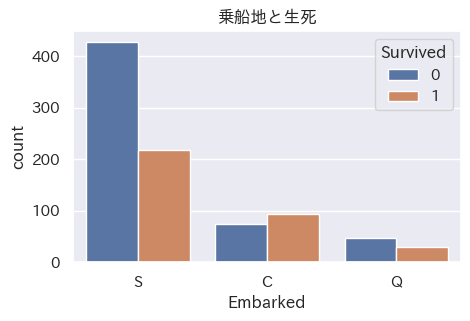

In [2144]:
plt.figure(figsize=(5, 3))
plt.title('乗船地と生死')
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.show()

In [2145]:
# 乗船値と生存に関係が見える。Cherbourgで乗船した人は生存率が高い
# 因果関係があるとは思えないんので、男女比や船室の投球に依存関係があると思われる 
# Southamptonで乗船した乗客は低収入の人が多い?

In [2146]:
cherbourg = train.loc[train['Embarked']=='C']
cherbourg['Pclass'].value_counts().sort_index()
# やはりCherbourgから乗船した客は1等の客が多い

1    85
2    17
3    66
Name: Pclass, dtype: int64

In [2147]:
southampton = train.loc[train['Embarked']=='S']
southampton['Pclass'].value_counts().sort_index()
# Southamptomは3等の乗客数が多い

1    127
2    164
3    353
Name: Pclass, dtype: int64

In [2148]:
queensland = train.loc[train['Embarked']=='Q']
queensland['Pclass'].value_counts().sort_index()
# Queenslandも3等の乗船客が多い

1     2
2     3
3    72
Name: Pclass, dtype: int64

In [2149]:
# 年齢と生存の関係

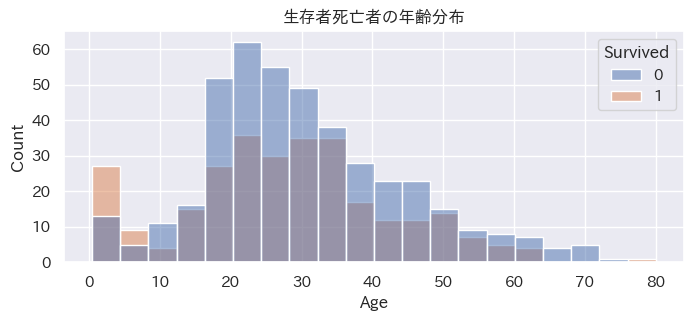

In [2150]:
plt.figure(figsize=(8, 3))
plt.title('生存者死亡者の年齢分布')
sns.histplot(data=train, x='Age', hue='Survived')
plt.show()

`10歳以下の生存率は高い`

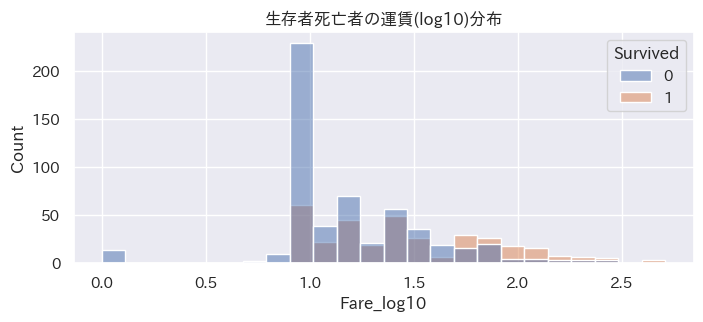

In [2151]:
plt.figure(figsize=(8, 3))
plt.title('生存者死亡者の運賃(log10)分布')
sns.histplot(data=train, x='Fare_log10', hue='Survived')
plt.show()
# 運賃が安いほど死亡率が高い

`運賃が安いほど死亡率が高い`

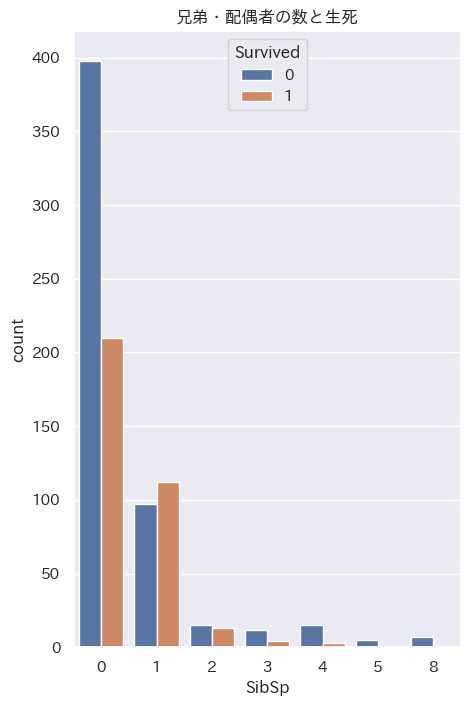

In [2152]:
plt.figure(figsize=(5, 8))
plt.title('兄弟・配偶者の数と生死')
sns.countplot(data=train, x='SibSp', hue='Survived')
plt.show()

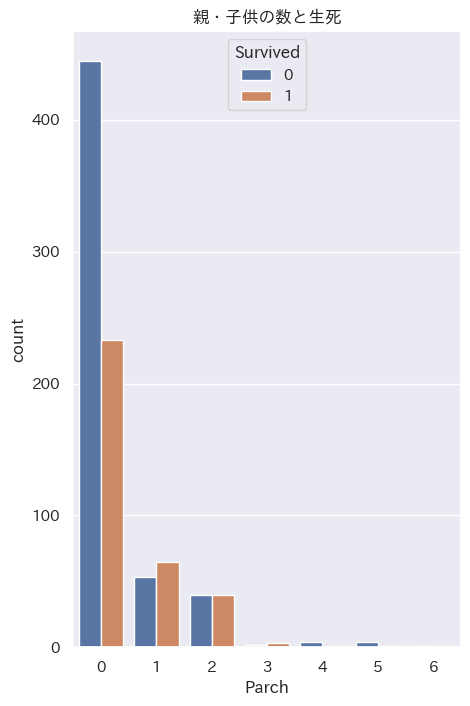

In [2153]:
plt.figure(figsize=(5, 8))
plt.title('親・子供の数と生死')
sns.countplot(data=train, x='Parch', hue='Survived')
plt.show()
# 子供がいるほど生き残りやすい

In [2154]:
# 性別を限定してグラフ化

In [2155]:
women = train.loc[train['Sex']=='female']
men = train.loc[train['Sex']=='male']

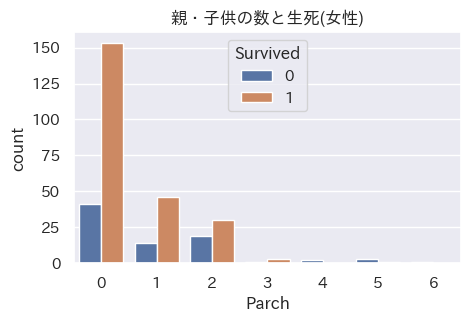

In [2156]:
plt.figure(figsize=(5, 3))
plt.title('親・子供の数と生死(女性)')
sns.countplot(data=women, x='Parch', hue='Survived')
plt.show()

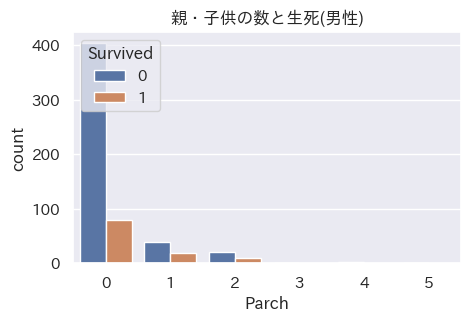

In [2157]:
plt.figure(figsize=(5, 3))
plt.title('親・子供の数と生死(男性)')
sns.countplot(data=men, x='Parch', hue='Survived')
plt.show()

In [2158]:
# -------------------------------------------------------------------
# 特徴量生成
# -------------------------------------------------------------------

`同乗者数である'Fellow'を生成`

In [2159]:
# 同乗者(Fellow)を生成
train['Fellow'] = train['SibSp'] + train['Parch']

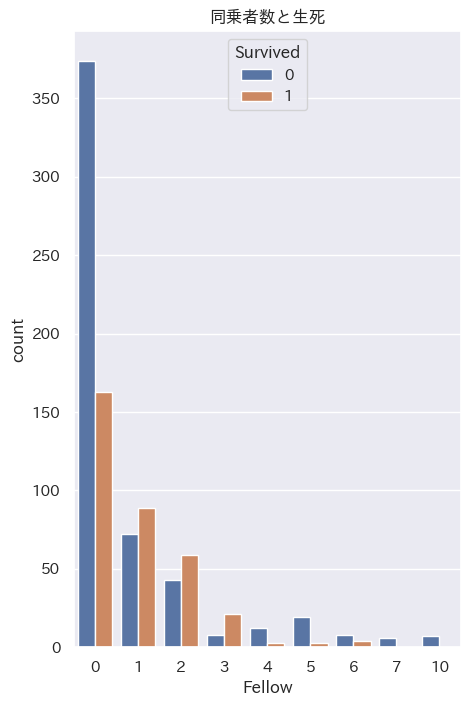

In [2160]:
plt.figure(figsize=(5, 8))
plt.title('同乗者数と生死')
sns.countplot(data=train, x='Fellow', hue='Survived')
plt.show()
# 同乗者数が1〜3だと生存率が高い

`同乗者数が1〜3人だと生存率が高い`

In [2161]:
# 同乗者有無フラグを生成
train['HasFellow'] = 0
train.loc[train['Fellow'] > 0, 'HasFellow'] = 1

In [2162]:
# 子供大人フラグ
train['Adult'] = 0
train.loc[train['Age'] > 10, 'Adult'] = 1

In [2163]:
# ------------------------------------------------------------------------
# 欠損値補完を行う
# ------------------------------------------------------------------------

In [2164]:
# 乗船地はよくわからないので、最頻値で補完
print(train['Embarked'].mode())
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

0    S
dtype: object


In [2165]:
# 女性客の平均年齢
women_age_mean = train.loc[train['Sex']=='female']['Age'].dropna().mean()
print(women_age_mean)

27.915708812260537


In [2166]:
# 女性客の平均年齢で女性客の欠損値を補完
train.loc[(train['Sex']=='female') & (train['Age'].isnull()), 'Age'] = train.loc[train['Sex']=='female']['Age'].dropna().mean()

In [2167]:
# 男性客の平均年齢
men_age_mean = train.loc[train['Sex']=='male']['Age'].dropna().mean()
print(men_age_mean)

30.72664459161148


In [2168]:
# 男性客の平均年齢で男性客の欠損値を補完
train.loc[(train['Sex']=='male') & (train['Age'].isnull()), 'Age'] = train.loc[train['Sex']=='male']['Age'].dropna().mean()

In [2169]:
# ------------------------------------------------------------------------
# ここからカテゴリ変数をエンコーディングを行う
# ------------------------------------------------------------------------

In [2170]:
import category_encoders as ce

In [2171]:
ce_ore = ce.OrdinalEncoder(cols=['Embarked', 'Sex'])
train = ce_ore.fit_transform(train)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log10,Fellow,HasFellow,Adult
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.250000,NaN,1,0.916454,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.283300,C85,2,1.859038,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,1,0.950608,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.100000,C123,1,1.733197,1,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.050000,NaN,1,0.956649,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.000000,NaN,1,1.146128,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.000000,0,0,112053,30.000000,B42,1,1.491362,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,27.915709,1,2,W./C. 6607,23.450000,NaN,1,1.388279,3,1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.000000,C148,2,1.491362,0,0,1


In [2173]:
# 相関行列を作成
train_corr = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fellow', 'Fare', 'Fare_log10', 'Embarked', 'HasFellow', 'Adult']].corr()
train_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fellow,Fare,Fare_log10,Embarked,HasFellow,Adult
Survived,1.000000,-0.338481,0.543351,-0.080453,-0.035322,0.081629,0.016639,0.257307,0.329862,0.106811,0.203367,0.013015
Pclass,-0.338481,1.000000,-0.131900,-0.330391,0.083081,0.018443,0.065997,-0.549500,-0.661022,0.045702,-0.135207,-0.219571
Sex,0.543351,-0.131900,1.000000,-0.103236,0.114631,0.245489,0.200988,0.182333,0.263276,0.116569,0.303646,0.004927
Age,-0.080453,-0.330391,-0.103236,1.000000,-0.236920,-0.182556,-0.253129,0.089079,0.097231,0.001913,-0.187312,0.311478
SibSp,-0.035322,0.083081,0.114631,-0.236920,1.000000,0.414838,0.890712,0.159651,0.318528,-0.059961,0.584471,-0.210805
Parch,0.081629,0.018443,0.245489,-0.182556,0.414838,1.000000,0.783111,0.216225,0.332186,-0.078665,0.583398,-0.097337
Fellow,0.016639,0.065997,0.200988,-0.253129,0.890712,0.783111,1.000000,0.217138,0.383658,-0.080281,0.690922,-0.192706
Fare,0.257307,-0.549500,0.182333,0.089079,0.159651,0.216225,0.217138,1.000000,0.787543,0.062142,0.271832,0.096217
Fare_log10,0.329862,-0.661022,0.263276,0.097231,0.318528,0.332186,0.383658,0.787543,1.000000,0.019588,0.478410,0.094132
Embarked,0.106811,0.045702,0.116569,0.001913,-0.059961,-0.078665,-0.080281,0.062142,0.019588,1.000000,-0.017807,-0.262096


<AxesSubplot:title={'center':'各変数の相関'}>

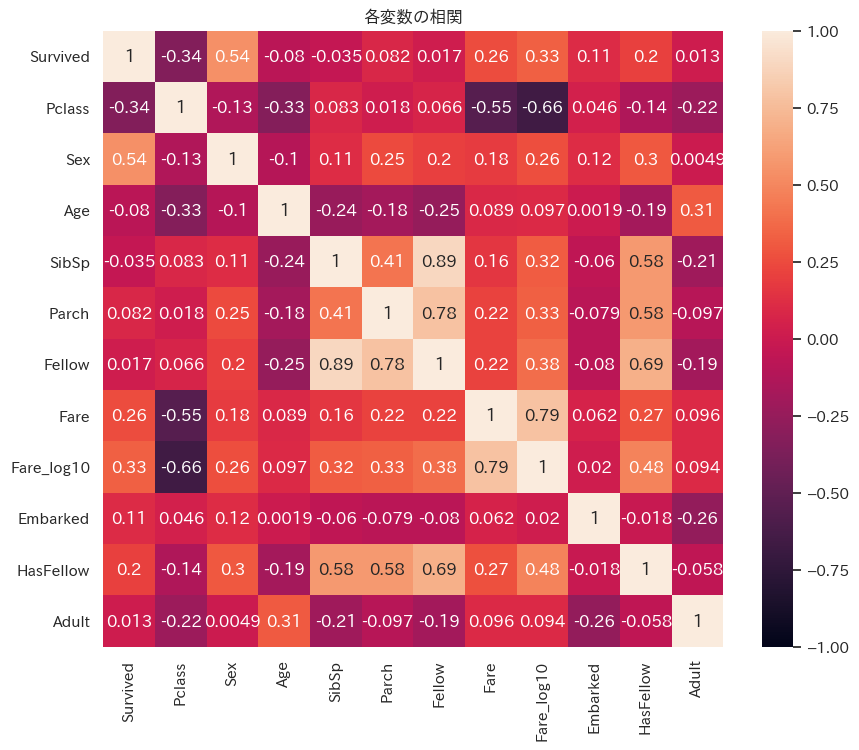

In [2174]:
plt.figure(figsize=(10, 8))
plt.title('各変数の相関')
sns.heatmap(data=train_corr, vmax=1.0, vmin=-1.0, annot=True)

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(train['Sex'].values, train['Survived'].values)

In [ ]:
# -------------------------------------------------------------------
# 評価データを読み込み
# -------------------------------------------------------------------
test = pd.read_csv(raw_path + 'test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# --------------------------------------------------------------------------------------
# 評価データ情報
# （欠損なし） PassengerId, Pclass, Name, Sex, SibSp, Parch, Ticket, Embarked
# （欠損あり） Age, Fare, Cabin
# --------------------------------------------------------------------------------------